Animation showing density (y=350,180,100,290) through various wind events. Sandbox-like. 

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [2]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [3]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

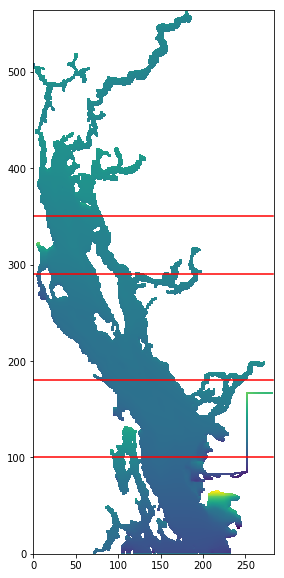

In [4]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
ax.pcolormesh(ma.masked_array(Jan04.variables['sossheig'][0,:,:], mask = 1-new_domain[0,:,:]))
viz_tools.set_aspect(ax)
ax.plot([0,283], [180, 180], 'r-')
ax.plot([0,283], [350,350], 'r-')
ax.plot([0,283], [100,100], 'r-')
ax.plot([0,283], [290,290], 'r-')

In [4]:
mask100 = 1 - new_domain[:,100,:]
mask180 = 1 - new_domain[:,180,:]
mask290 = 1 - new_domain[:,290,:]
mask350 = 1 - new_domain[:,350,:]

In [5]:
rc('animation', html='html5')

In [6]:
def animatedensity(file, yslice, xlims, ylims, mesh_mask):
    pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file.variables['nav_lat'][yslice,:][:],1)).T])
    fig,ax = plt.subplots(figsize=(8,8))
    deptht = file.variables['deptht'][:]
    yslicemask = 1 - mesh_mask[:,yslice,:]
    def animate30(i):
        ax.clear()
        density1 = calc_rho(file.variables['vosaline'][i,:,yslice,:],
                                        file.variables['votemper'][i,:,yslice,:],
                                        pressure1)
        masked_density1 = ma.masked_array(density1, mask = yslicemask)
        den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
        ax.set_ylim(ylims)
        ax.set_xlim(xlims)
        ax.set_title('Y = ' + str(yslice) + ', hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
    return ani40

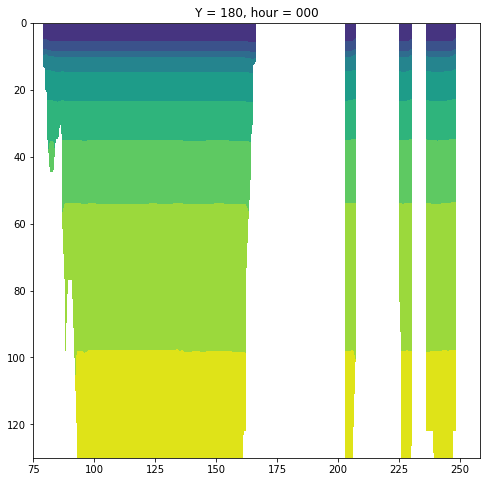

In [7]:
animatedensity(Jan04, 180, (75,258), (130,0), new_domain)

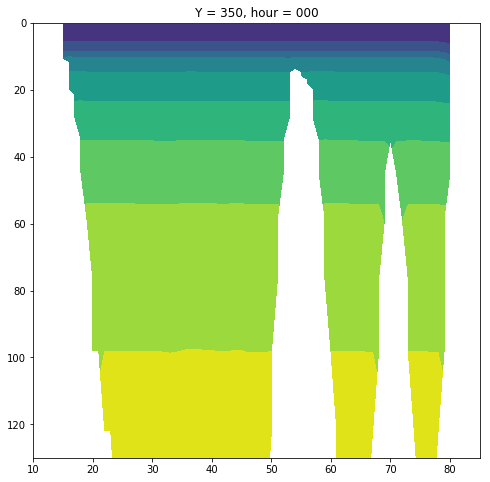

In [47]:
animatedensity(Jan04, 350, (10,85), (130,0), new_domain)

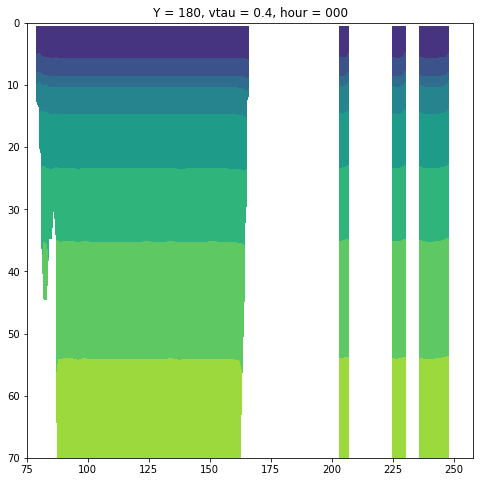

In [7]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(Jan04.variables['nav_lat'][180,:][:],1)).T])
fig,ax = plt.subplots(figsize=(8,8))
deptht = Jan04.variables['deptht'][:]
def animate30(i):
    ax.clear()
    density1 = calc_rho(Jan04.variables['vosaline'][i,:,180,:],
                                        Jan04.variables['votemper'][i,:,180,:],
                                        pressure1)
    masked_density1 = ma.masked_array(density1, mask = mask180)
    den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
    ax.set_ylim((70,0))
    ax.set_xlim((75,258))
    ax.set_title('Y = 180, vtau = 0.4, hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
ani40

(85, 210)

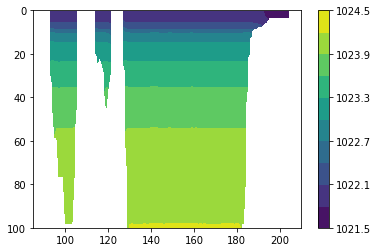

In [21]:
fig,ax = plt.subplots()
i=0
density1 = calc_rho(Jan04.variables['vosaline'][i,:,100,:],
                                        Jan04.variables['votemper'][i,:,100,:],
                                        pressure1)
masked_density1 = ma.masked_array(density1, mask = mask100)
den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
fig.colorbar(den, ax=ax)
ax.set_ylim((100,0))
ax.set_xlim((85,210))
#ax.set_title('Y = 180, vtau = 0.4, hour = %03d'%(i)) 

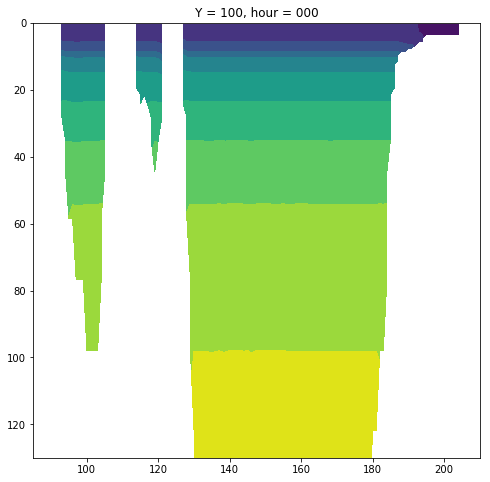

In [48]:
animatedensity(Jan04,100,(85,210), (130,0), new_domain)

(40, 0)

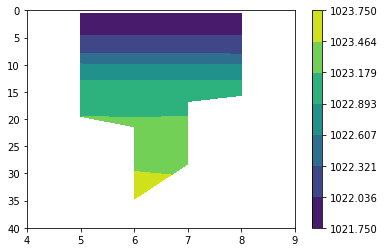

In [35]:
fig,ax = plt.subplots()
i=0
density1 = calc_rho(Jan04.variables['vosaline'][i,:,290,4:10],
                                        Jan04.variables['votemper'][i,:,290,4:10],
                                        pressure1)
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,290, 4:10])
den = ax.contourf(np.arange(4,10), deptht, masked_density1, 
                      levels = np.linspace(1021.75, 1023.75, 8) #, colors='black'
            )
fig.colorbar(den, ax=ax)
ax.set_ylim((40,0))
#ax.set_xlim((4,9))

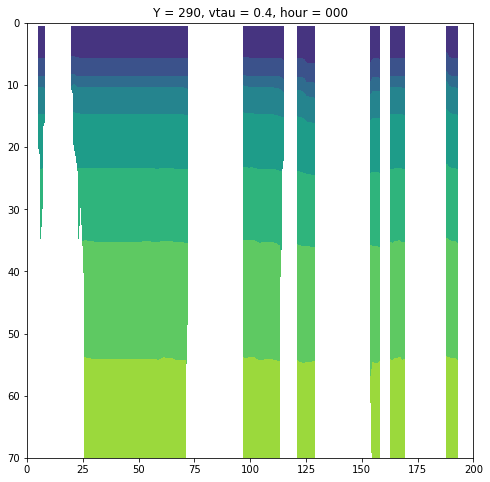

In [27]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(Jan04.variables['nav_lat'][290,:][:],1)).T])
fig,ax = plt.subplots(figsize=(8,8))
deptht = Jan04.variables['deptht'][:]
def animate30(i):
    ax.clear()
    density1 = calc_rho(Jan04.variables['vosaline'][i,:,290,:],
                                        Jan04.variables['votemper'][i,:,290,:],
                                        pressure1)
    masked_density1 = ma.masked_array(density1, mask = mask290)
    den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
    ax.set_ylim((70,0))
    ax.set_xlim((0,200))
    ax.set_title('Y = 290, vtau = 0.4, hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
ani40

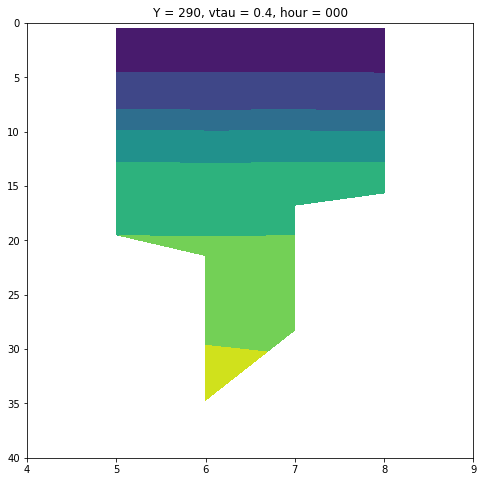

In [40]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(6),
                                        (np.ones([6,40]) *np.expand_dims(Jan04.variables['nav_lat'][290,4:10][:],1)).T])
fig,ax = plt.subplots(figsize=(8,8))
deptht = Jan04.variables['deptht'][:]
mask = 1 - new_domain[:,290,4:10]
def animate30(i):
    ax.clear()
    density1 = calc_rho(Jan04.variables['vosaline'][i,:,290,4:10],
                                        Jan04.variables['votemper'][i,:,290,4:10],
                                        pressure1)
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(np.arange(4,10), deptht, masked_density1, 
                      levels = np.linspace(1021.75, 1023.75, 8) #, colors='black'
            )
    ax.set_ylim((40,0))
    #ax.set_xlim((0,200))
    ax.set_title('Y = 290, vtau = 0.4, hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds     
ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
ani40

# January. vtau = -0.4

In [49]:
JanW04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan-0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

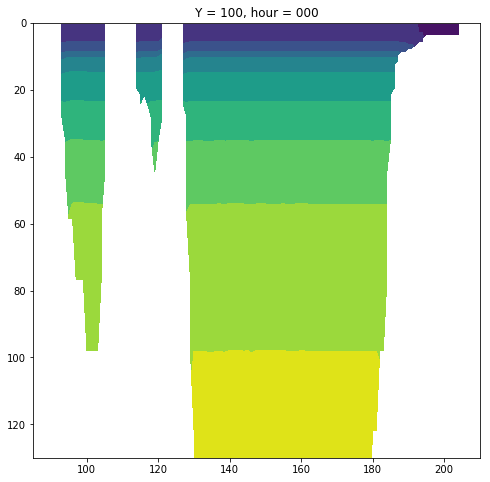

In [50]:
animatedensity(JanW04, 100, (85, 210), (130,0), new_domain)

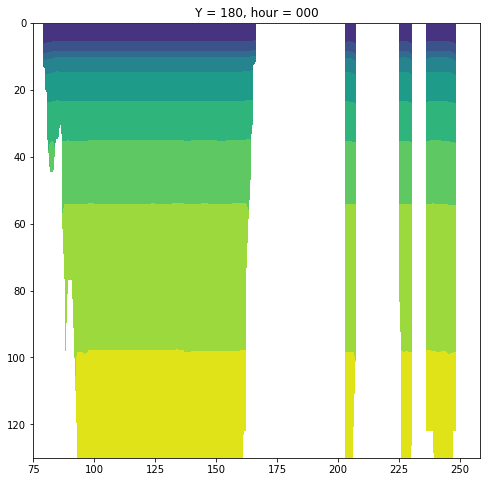

In [51]:
animatedensity(JanW04, 180, (75, 258), (130,0), new_domain)

In [ ]:
animatedensity(JanW04, 290, (0,200), (130,0), new_domain)

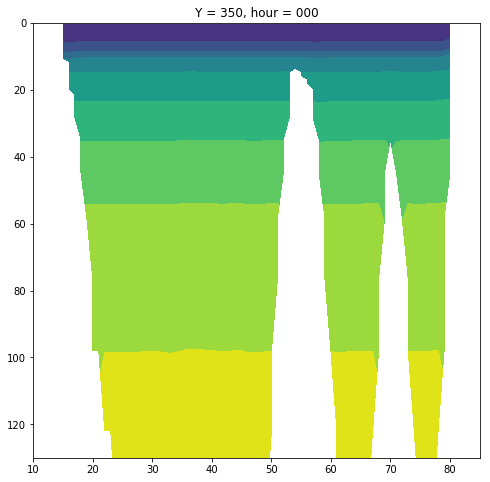

In [52]:
animatedensity(JanW04, 350, (10,85), (130,0), new_domain)

# June, vtau = 0.4

In [53]:
Jun04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun0.4/SalishSea_1h_20160601_20160607_grid_T.nc')

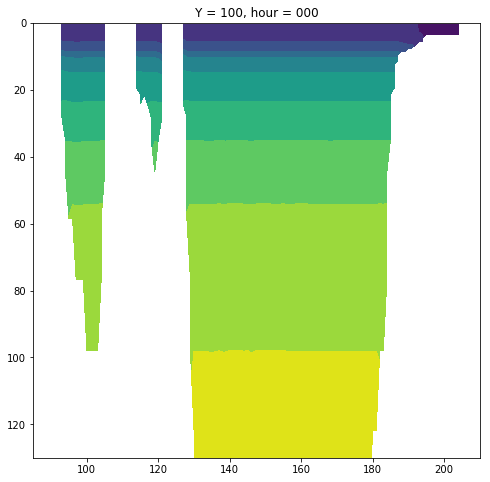

In [54]:
animatedensity(Jun04, 100, (85,210), (130,0), new_domain)

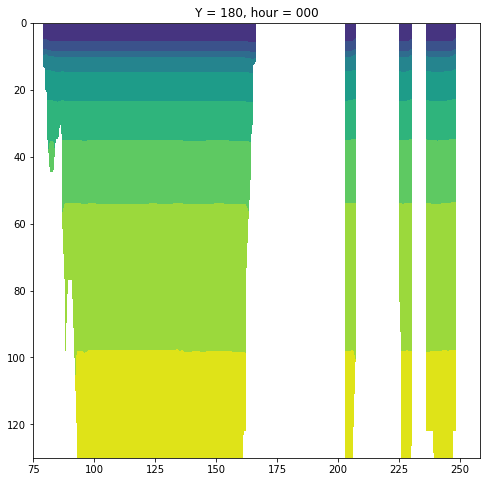

In [55]:
animatedensity(Jun04, 180, (75,258), (130,0), new_domain)

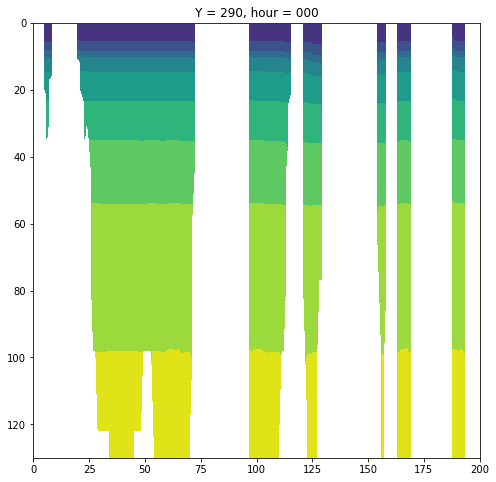

In [56]:
animatedensity(Jun04, 290, (0,200), (130,0), new_domain)

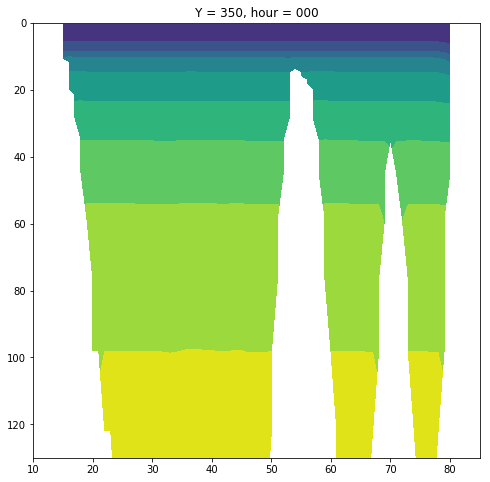

In [57]:
animatedensity(Jun04, 350, (10,85), (130,0), new_domain)

# June, vtau = -0.4

In [58]:
JunW04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun-0.4/SalishSea_1h_20160601_20160607_grid_T.nc')

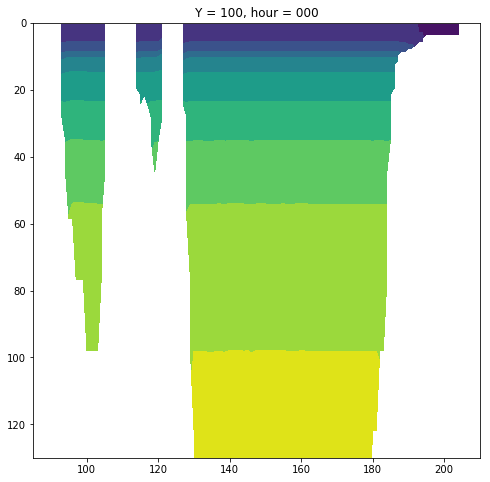

In [59]:
animatedensity(JunW04, 100, (85,210), (130,0), new_domain)

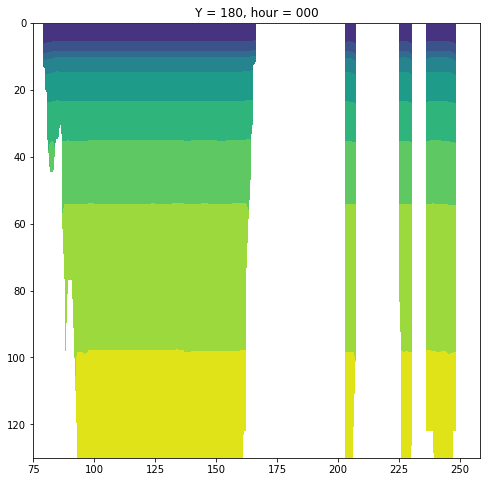

In [60]:
animatedensity(JunW04, 180, (75,258), (130,0), new_domain)

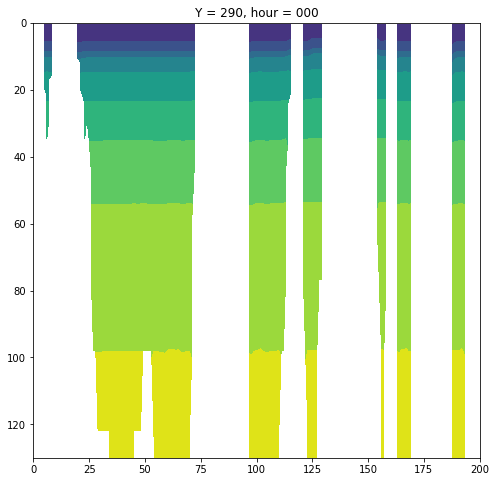

In [61]:
animatedensity(JunW04, 290, (0,200), (130,0), new_domain)

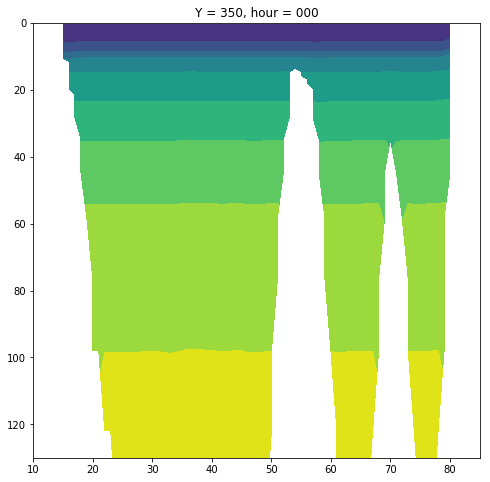

In [62]:
animatedensity(JunW04, 350, (10,85), (130,0), new_domain)

(10, 85)

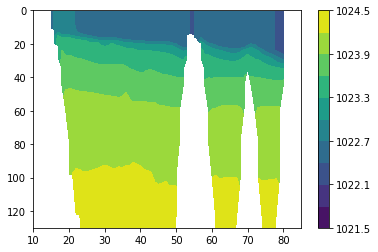

In [10]:
fig,ax = plt.subplots()
file = Jan04
i=5
yslice = 350
ylims=(130,0)
xlims=(10,85)
deptht = Jan04.variables['deptht'][:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(Jan04.variables['nav_lat'][180,:][:],1)).T])
density1 = calc_rho(file.variables['vosaline'][i,:,yslice,:],
                                        file.variables['votemper'][i,:,yslice,:],
                                        pressure1)
masked_density1 = ma.masked_array(density1, mask = mask350)
den = ax.contourf(np.arange(0,284), deptht, masked_density1, 
                      levels = np.linspace(1021.5, 1024.5, 11) #, colors='black'
            )
fig.colorbar(den,ax=ax)
ax.set_ylim(ylims)
ax.set_xlim(xlims)